In [18]:
#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed
#and draw inferences.

#Data Description:
#Murder -- Muder rates in different places of United States
#Assualt- Assualt rate in different places of United States
#UrbanPop - urban population in different places of United States
#Rape - Rape rate in different places of United States


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [21]:
df= pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 250
sns.set_style('darkgrid')

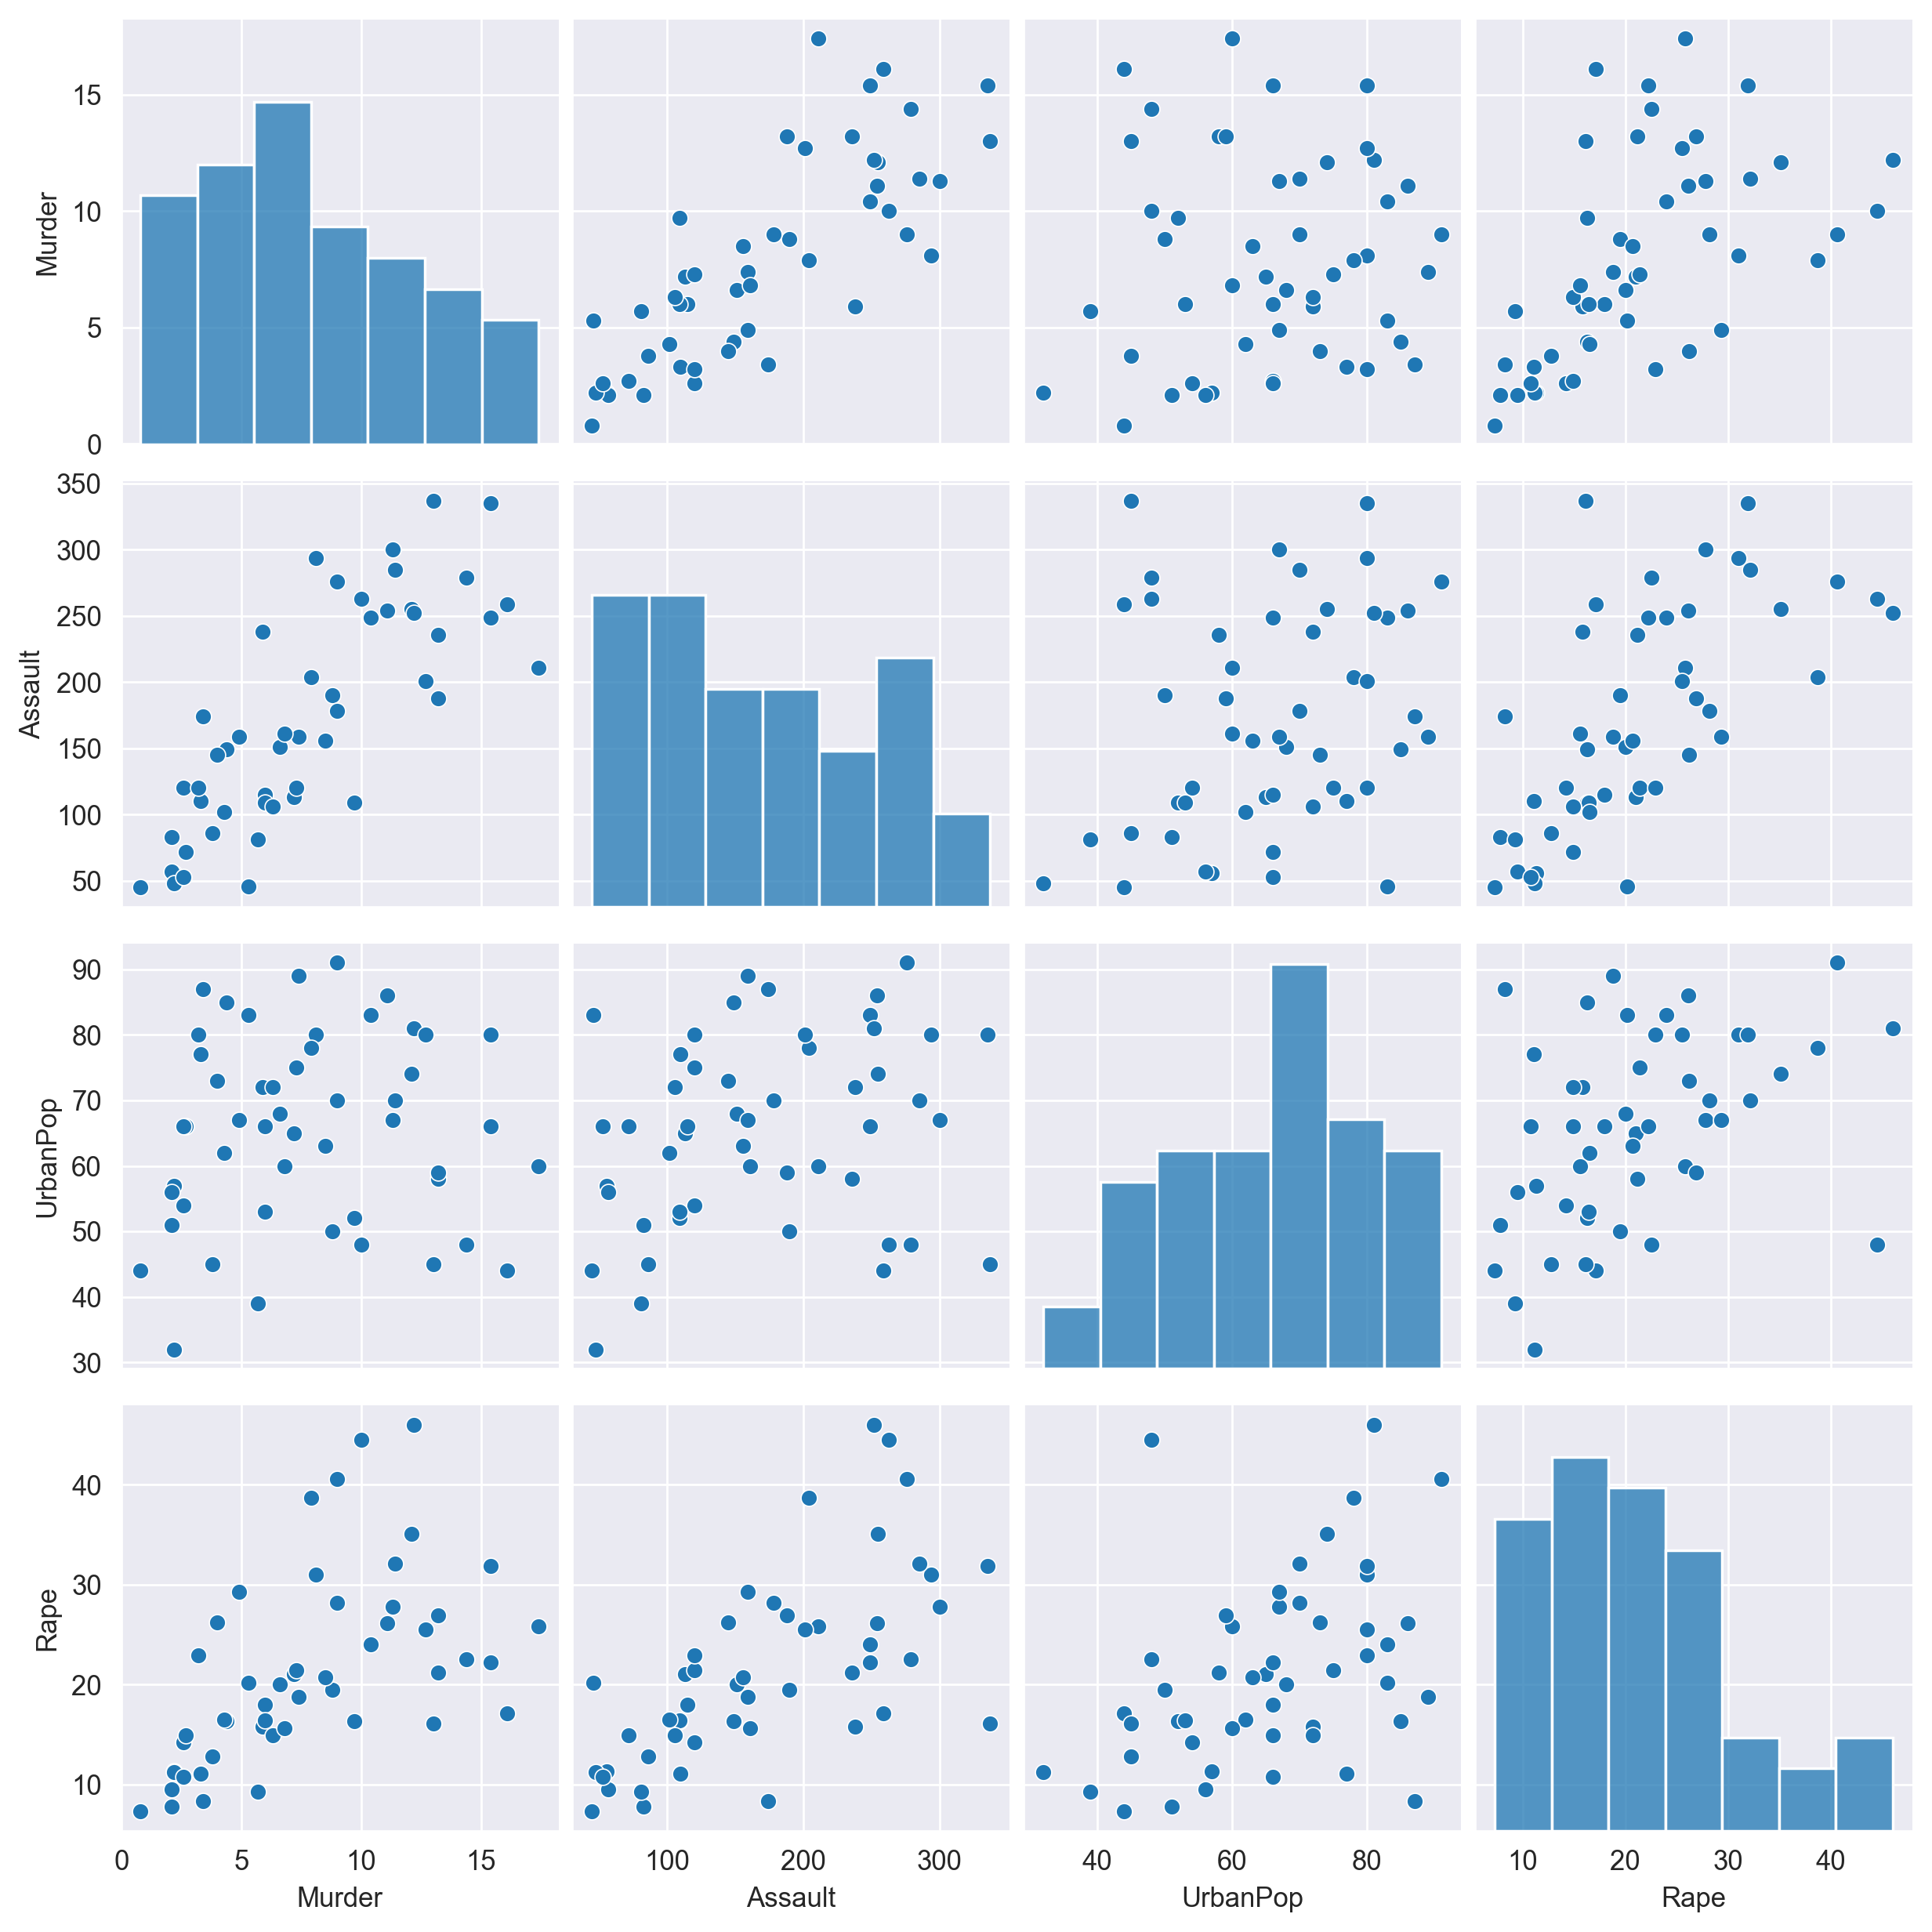

In [36]:
sns.pairplot(df)

In [25]:
df1 = df.drop(columns=['Unnamed: 0'])

In [26]:
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [28]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
df1 = sc.fit_transform(df1)
df1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [32]:
from scipy.cluster import hierarchy

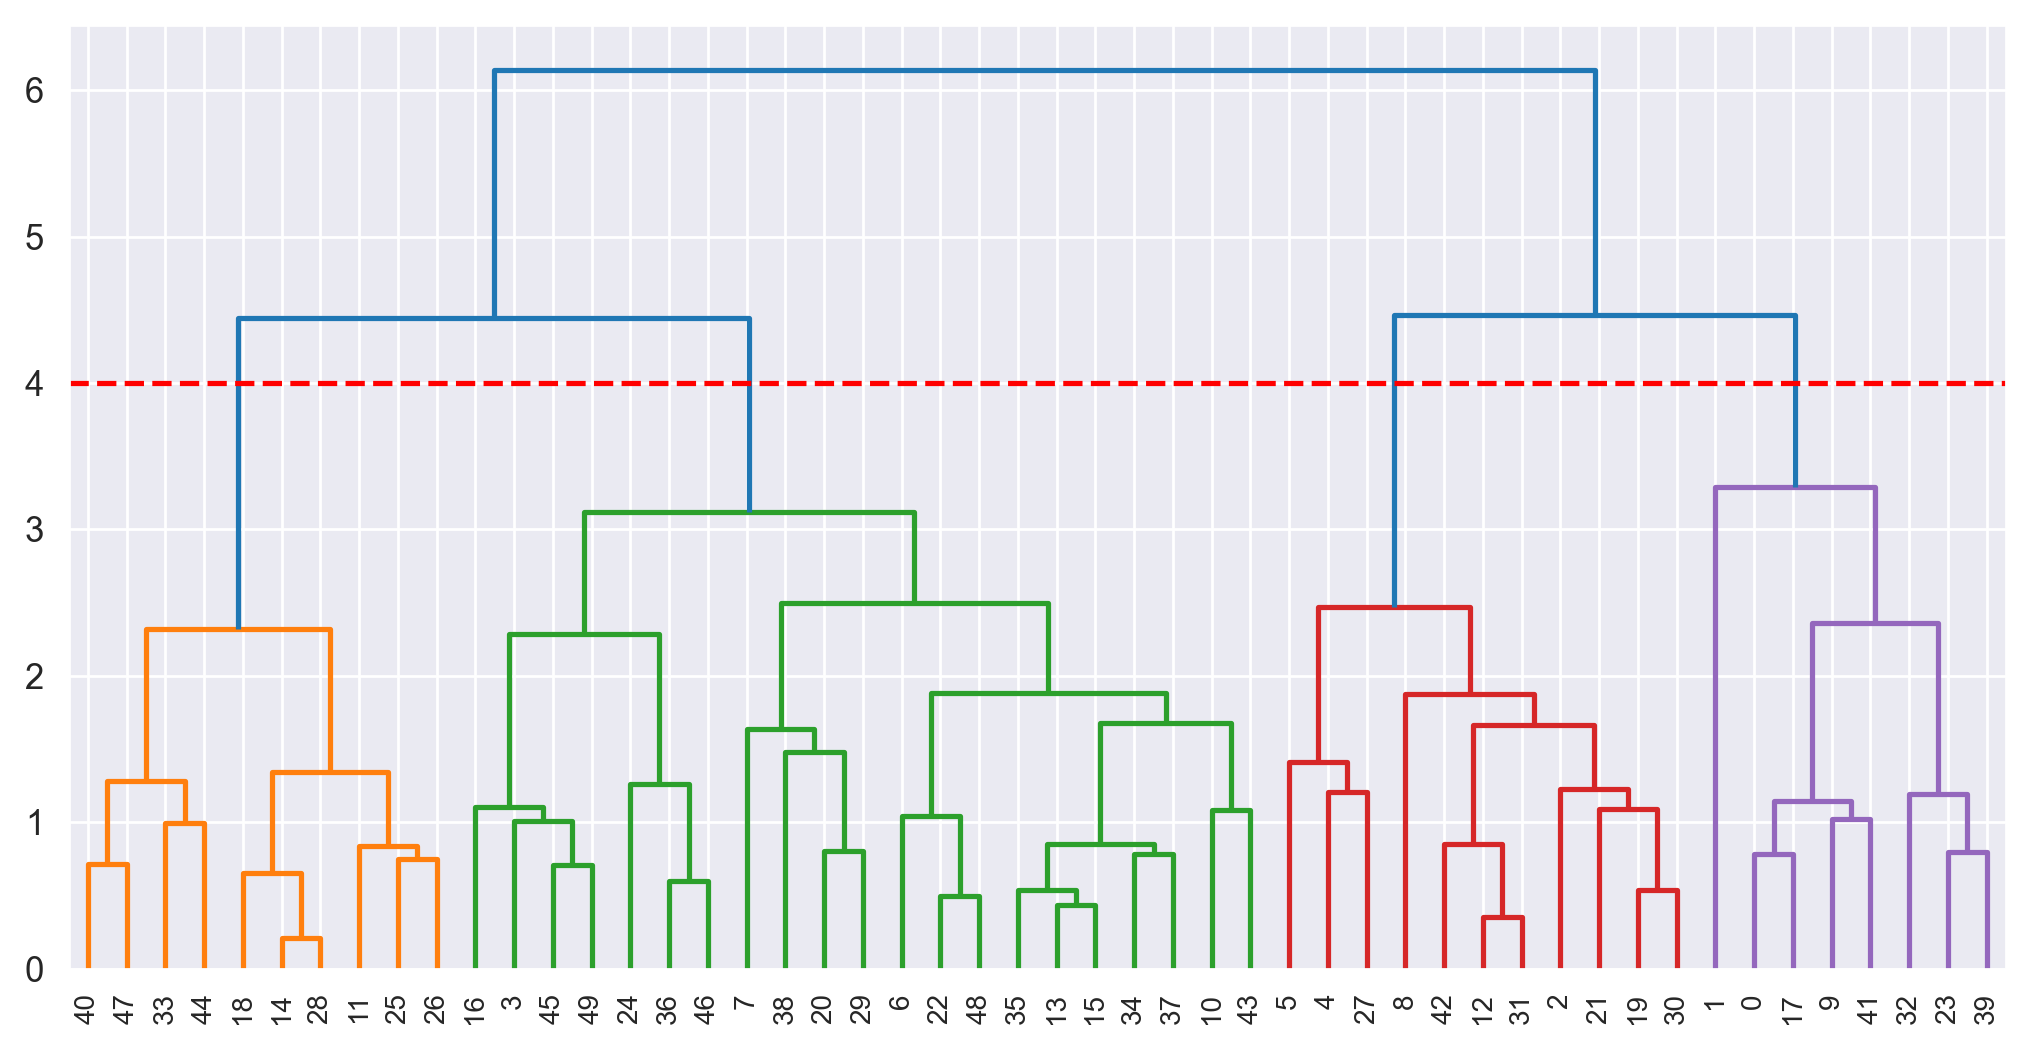

In [39]:
lk = hierarchy.linkage(df1,method ='complete')
dendrogram =hierarchy.dendrogram(lk)
plt.axhline(y=4, c ='red', linestyle = '--')

In [40]:
#model Building

from sklearn.cluster import AgglomerativeClustering

In [44]:
hc = AgglomerativeClustering(n_clusters=4)

y = hc.fit_predict(df1)
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [46]:
df['Cluster'] = y
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [51]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

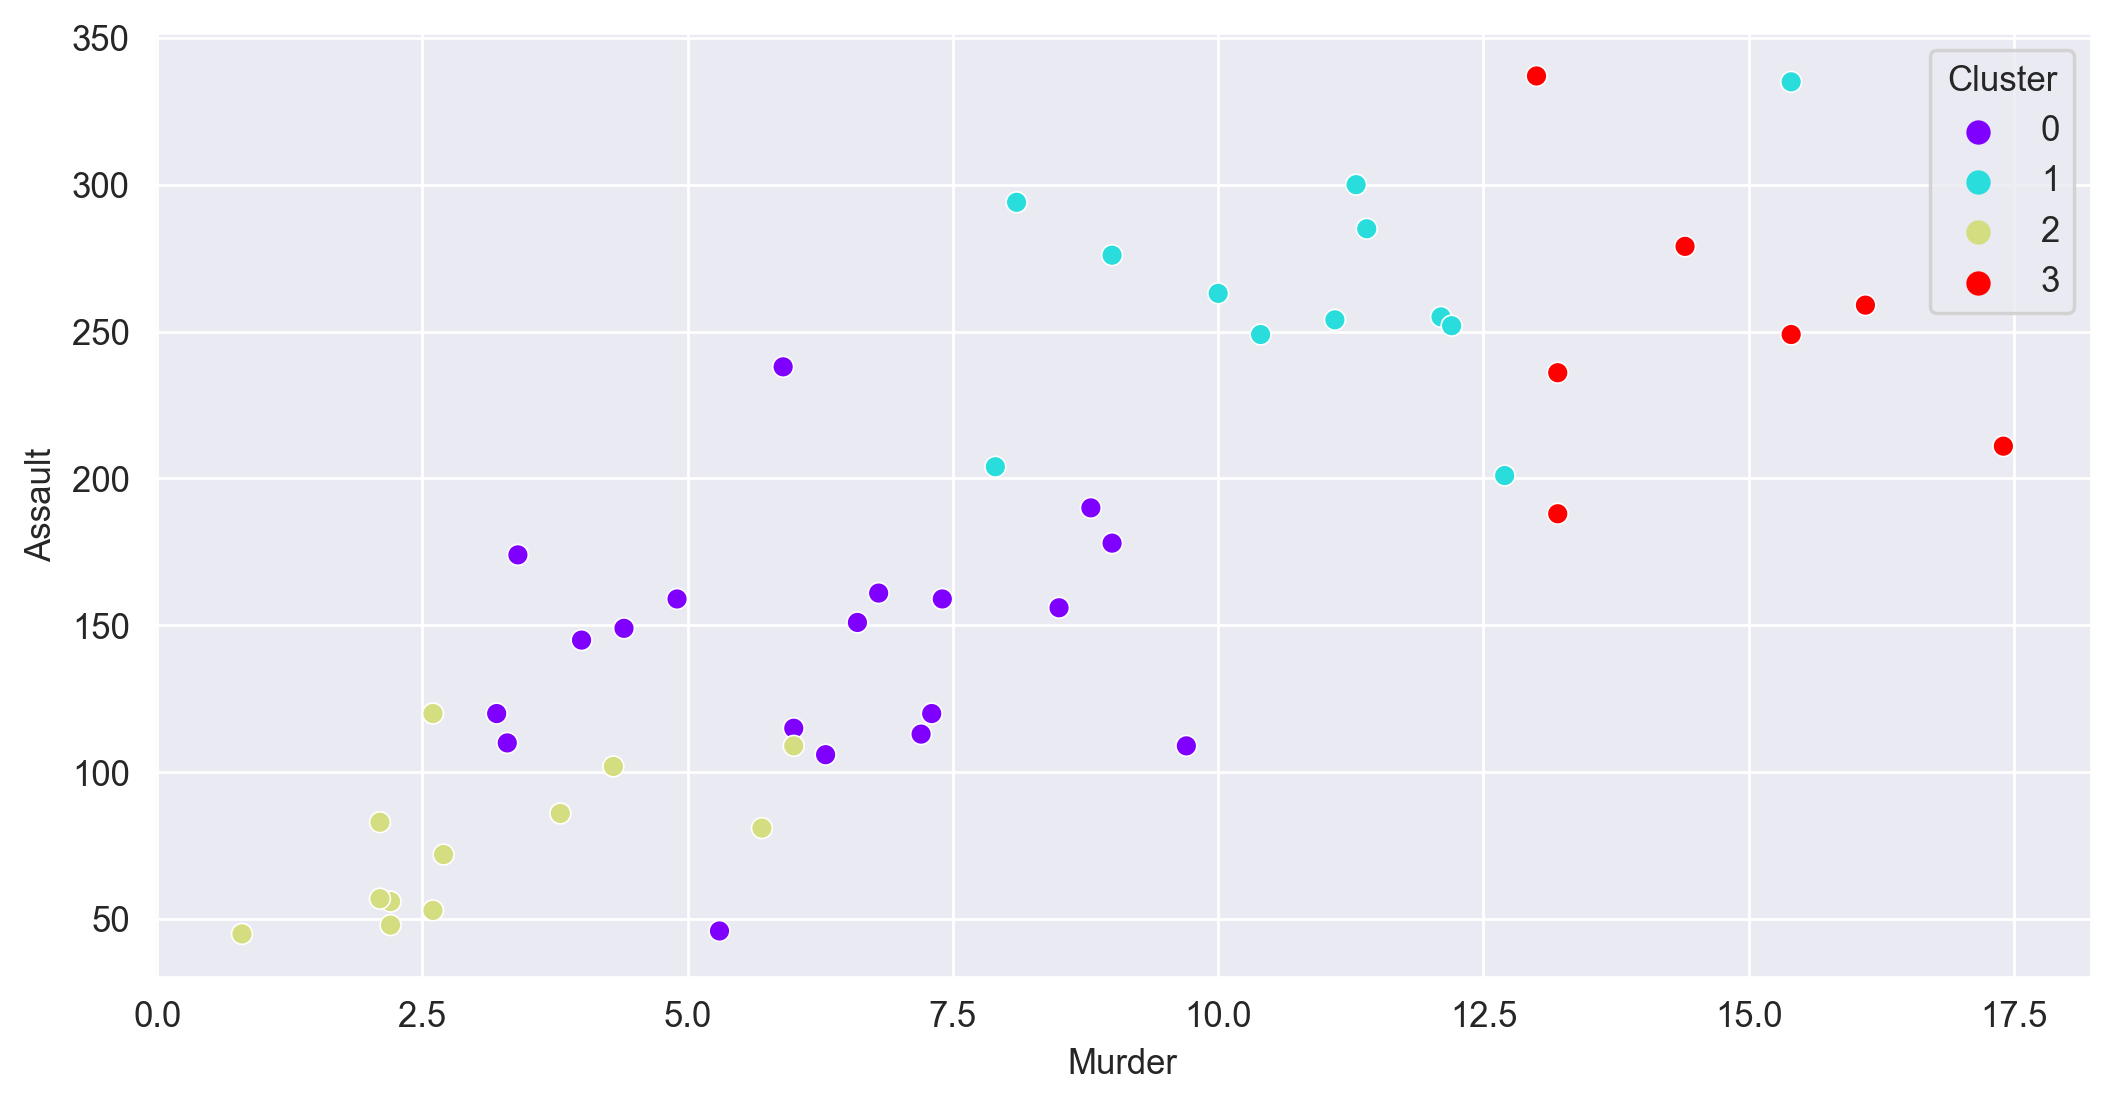

In [54]:
sns.scatterplot(df['Murder'], df['Assault'] , hue =df['Cluster'], palette = 'rainbow')

# K _Means Clustering 

In [60]:
from sklearn.cluster import KMeans


In [61]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [93]:

new_df = df.drop(columns=['Unnamed: 0'] ,inplace= True)

In [94]:
new_df = df.drop(columns=['Cluster'])
new_df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [85]:
km =KMeans()

c = km.fit_predict(df1)
c

array([0, 5, 7, 4, 7, 7, 2, 4, 7, 0, 2, 1, 3, 4, 1, 4, 4, 0, 1, 7, 2, 7,
       1, 6, 3, 4, 4, 7, 1, 2, 7, 3, 6, 1, 2, 4, 4, 2, 2, 6, 1, 0, 3, 2,
       1, 4, 2, 1, 1, 4])

In [98]:
df2 = pd.DataFrame(df1, columns=new_df.columns)
df2['Cluster']= c
df2

,Murder,Assault,UrbanPop,Rape,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,5
2,0.072361,1.493817,1.009122,1.053466,7
3,0.234708,0.233212,-1.084492,-0.186794,4
4,0.281093,1.275635,1.776781,2.088814,7
5,0.025976,0.402909,0.869548,1.883901,7
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,4
8,1.765415,1.990786,1.009122,1.150530,7
9,2.229265,0.487757,-0.386621,0.492653,0


In [102]:
km.cluster_centers_

array([[ 1.62625962,  0.60896914, -0.33428047,  0.30122146],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [ 0.69855875,  0.60290854,  0.99167546,  0.50883024],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 1.55668205,  1.46553402, -1.38690338, -0.28745278],
       [ 0.7275494 ,  1.26502915,  0.84337776,  1.52800061]])

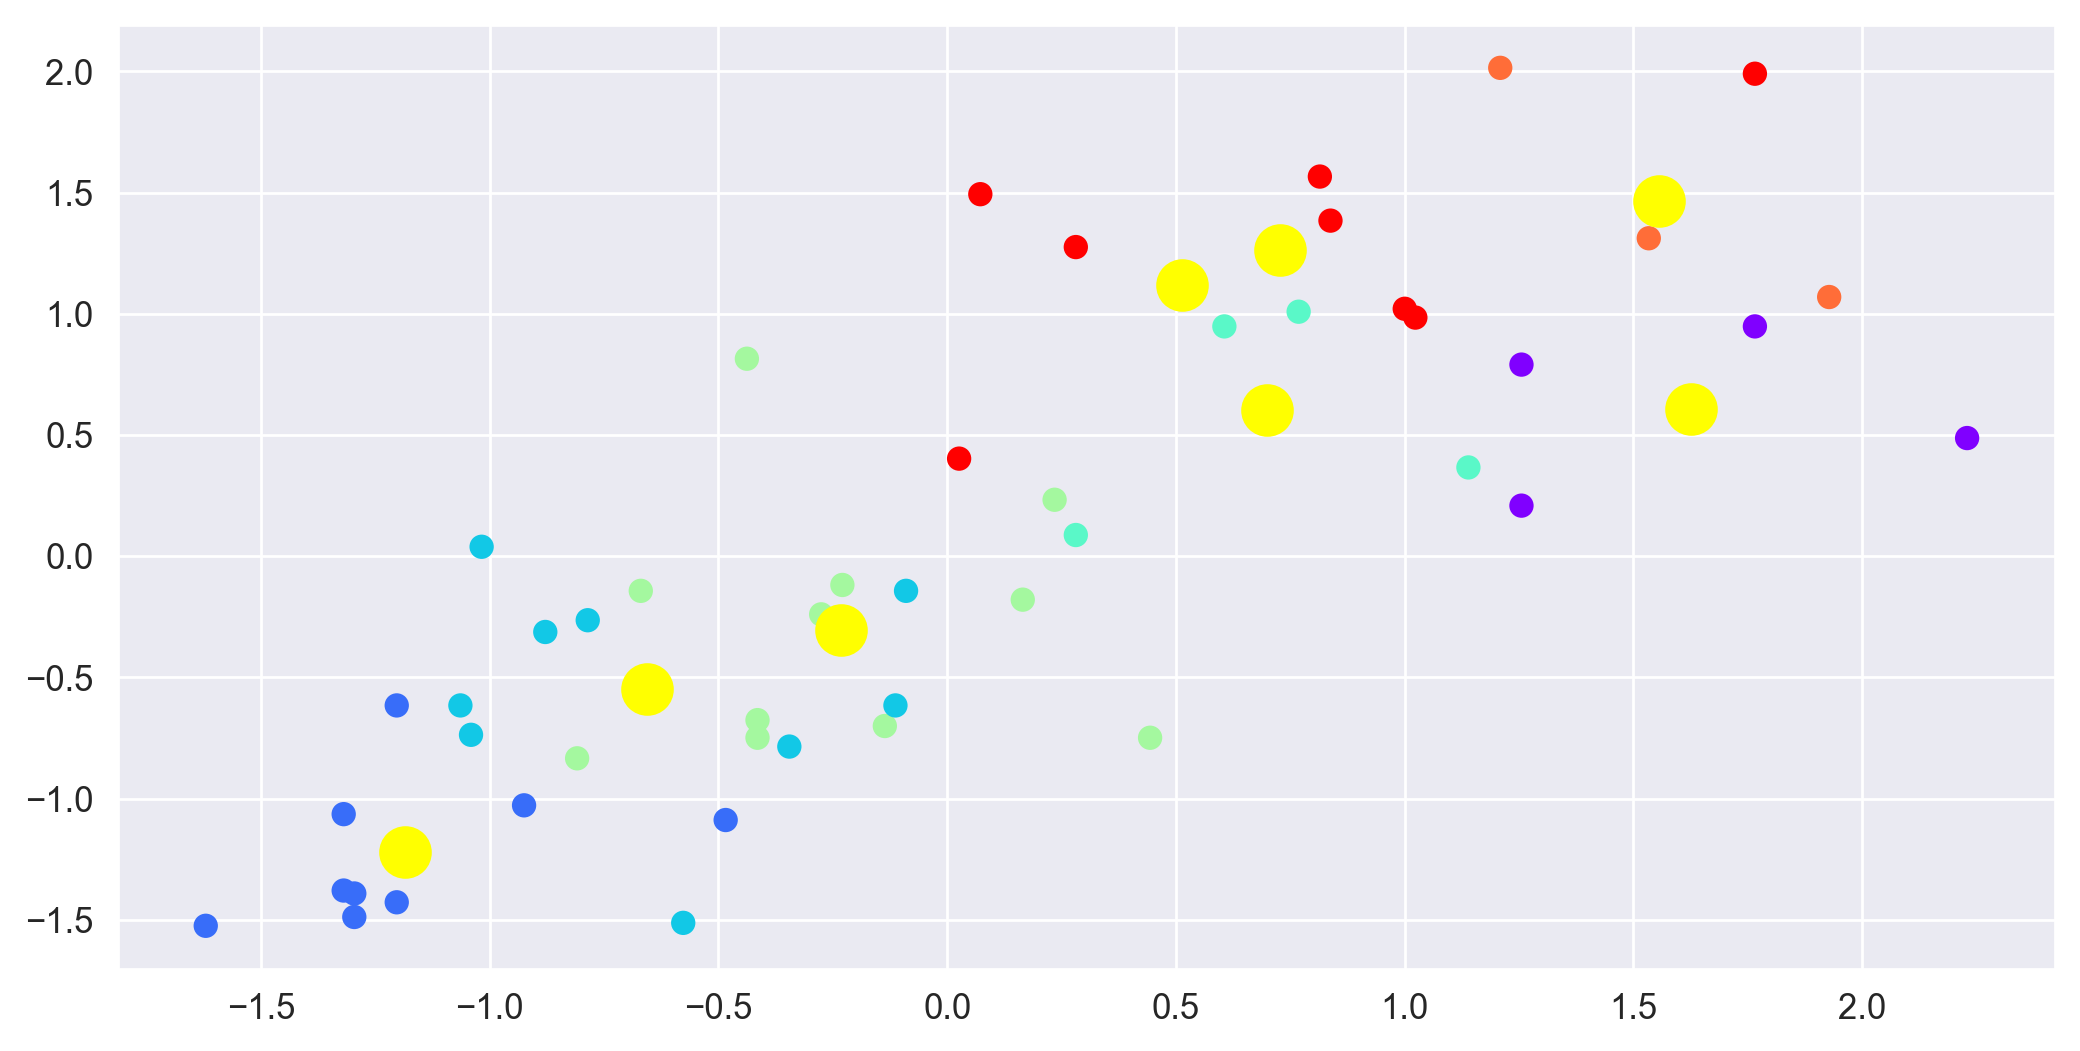

In [104]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=df2['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c ='yellow', s = 200)

In [106]:
#Elbow_Graph

wcss =[]


for i in range(1,10):
    km= KMeans(n_clusters=i)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [107]:
wcss

[200.00000000000006,
 104.96163315756871,
 79.95548163171664,
 57.55425863091105,
 50.076562894939464,
 45.00476279062756,
 41.12559485122101,
 36.08885698225332,
 31.96840177141179]

Text(0, 0.5, 'WCSS')

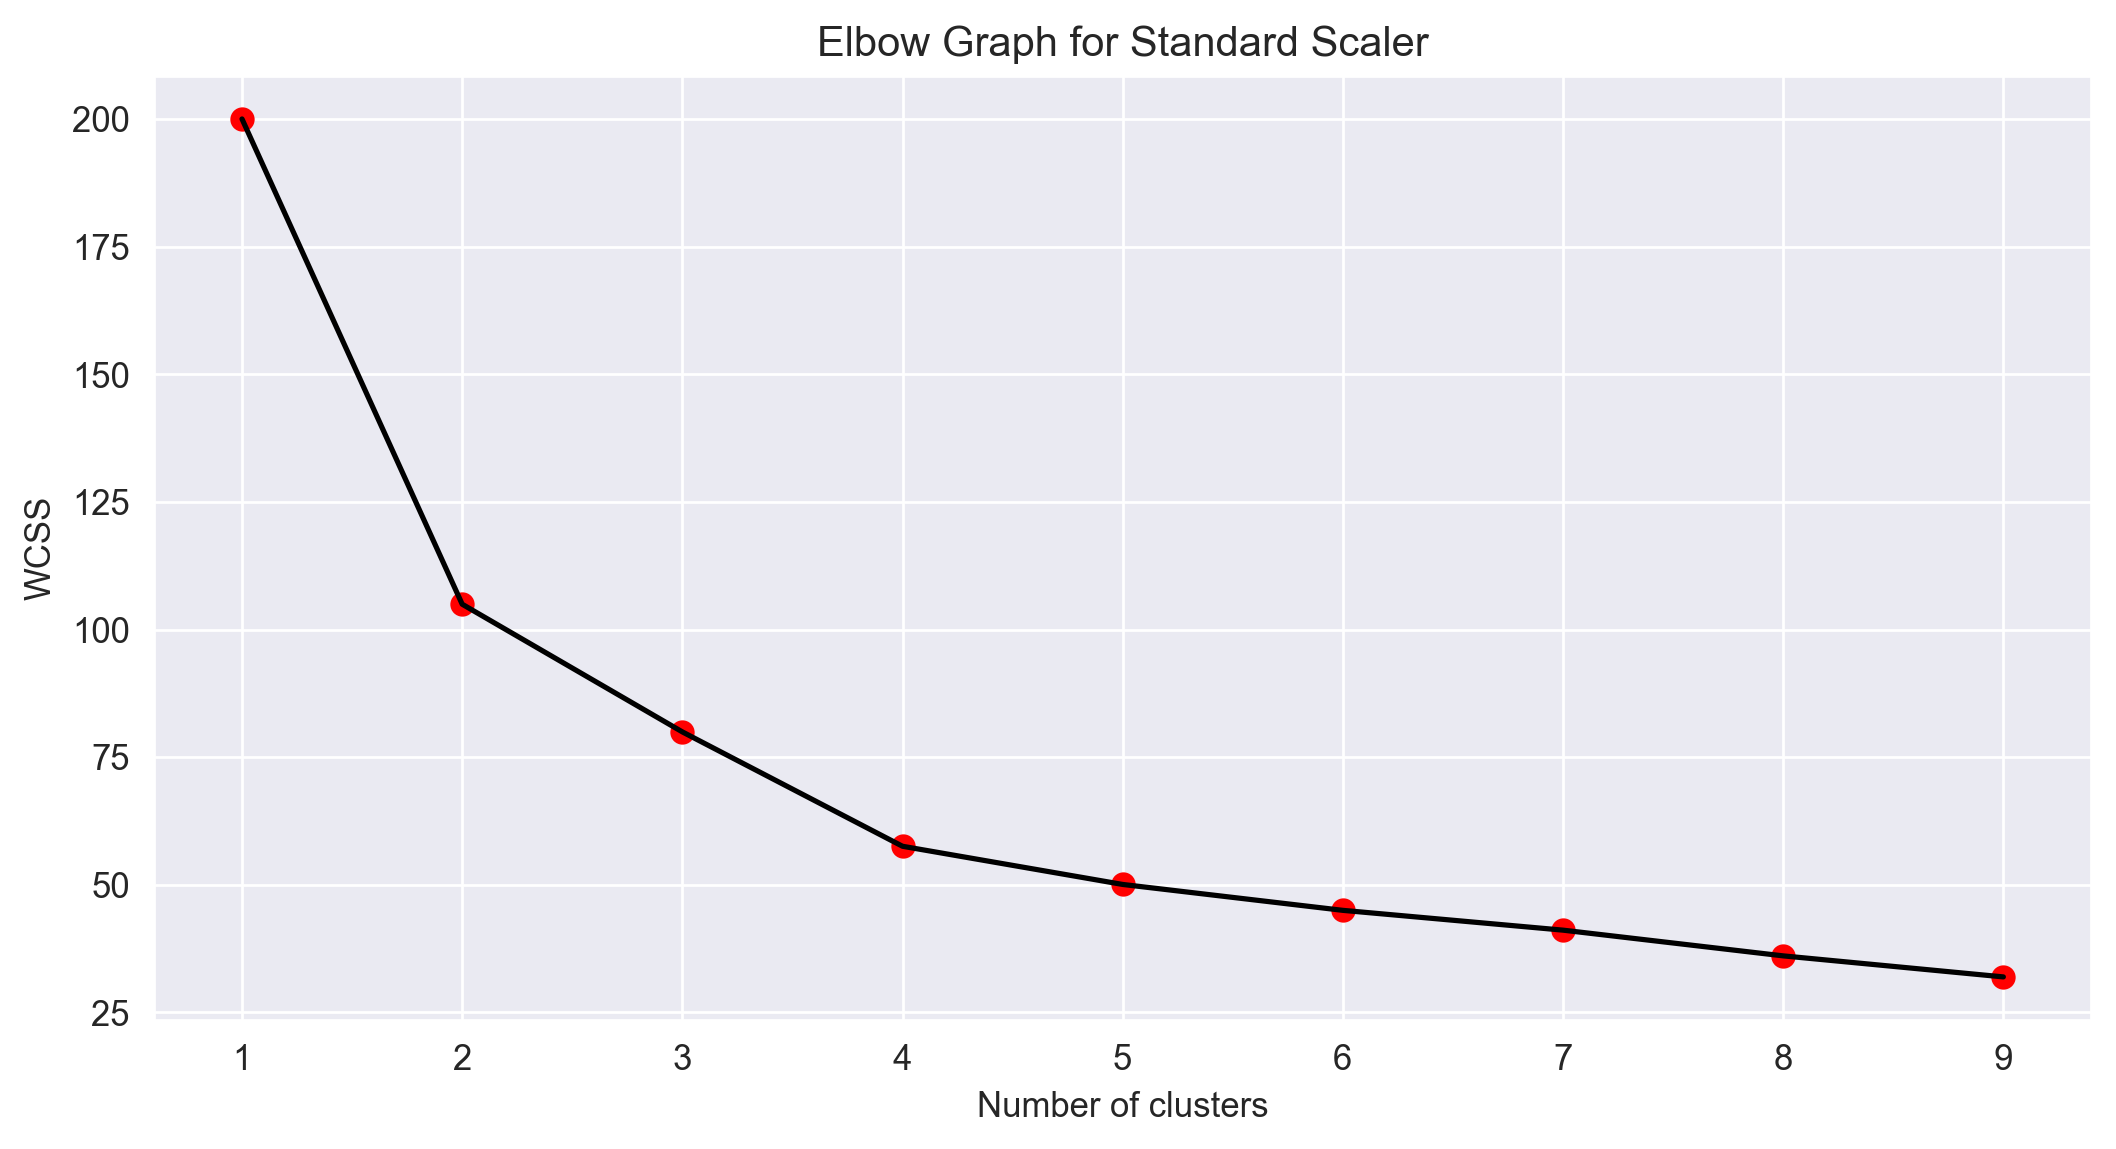

In [113]:

plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [115]:
#final model for k-Means clustering

km = KMeans(n_clusters = 4)
y = km.fit_predict(df1)
y

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 3, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [117]:
new_df['cluster']= y
new_df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [119]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [126]:
data =pd.DataFrame(df1, columns=['Murder','Assault','UrbanPop','Rape'])
data

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


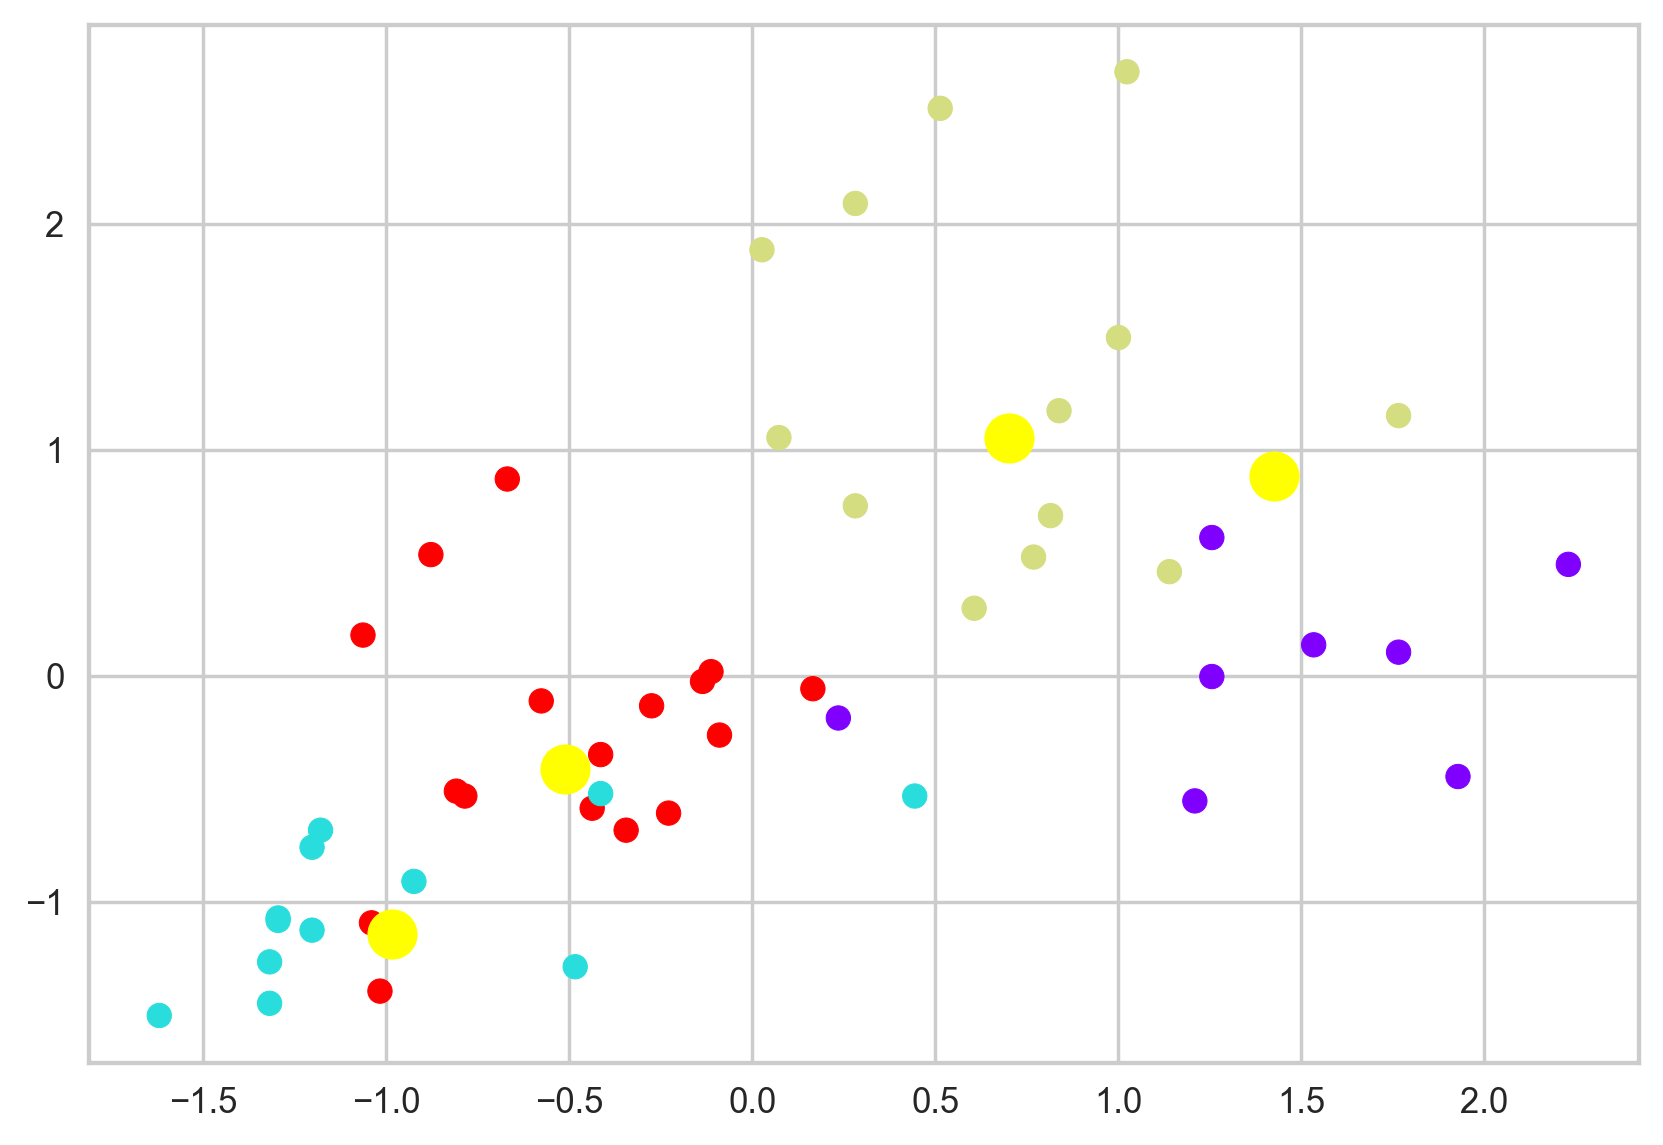

In [150]:
data['cluster']=y
plt.scatter(data['Murder'],data['Rape'], c = data['cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c ='yellow', s = 200)

In [ ]:
#Evaluation OF KmEans

In [139]:
from sklearn.metrics import silhouette_score

In [140]:
silhouette_score(df1,y)

0.3387340896430468

In [147]:
from yellowbrick.cluster import SilhouetteVisualizer

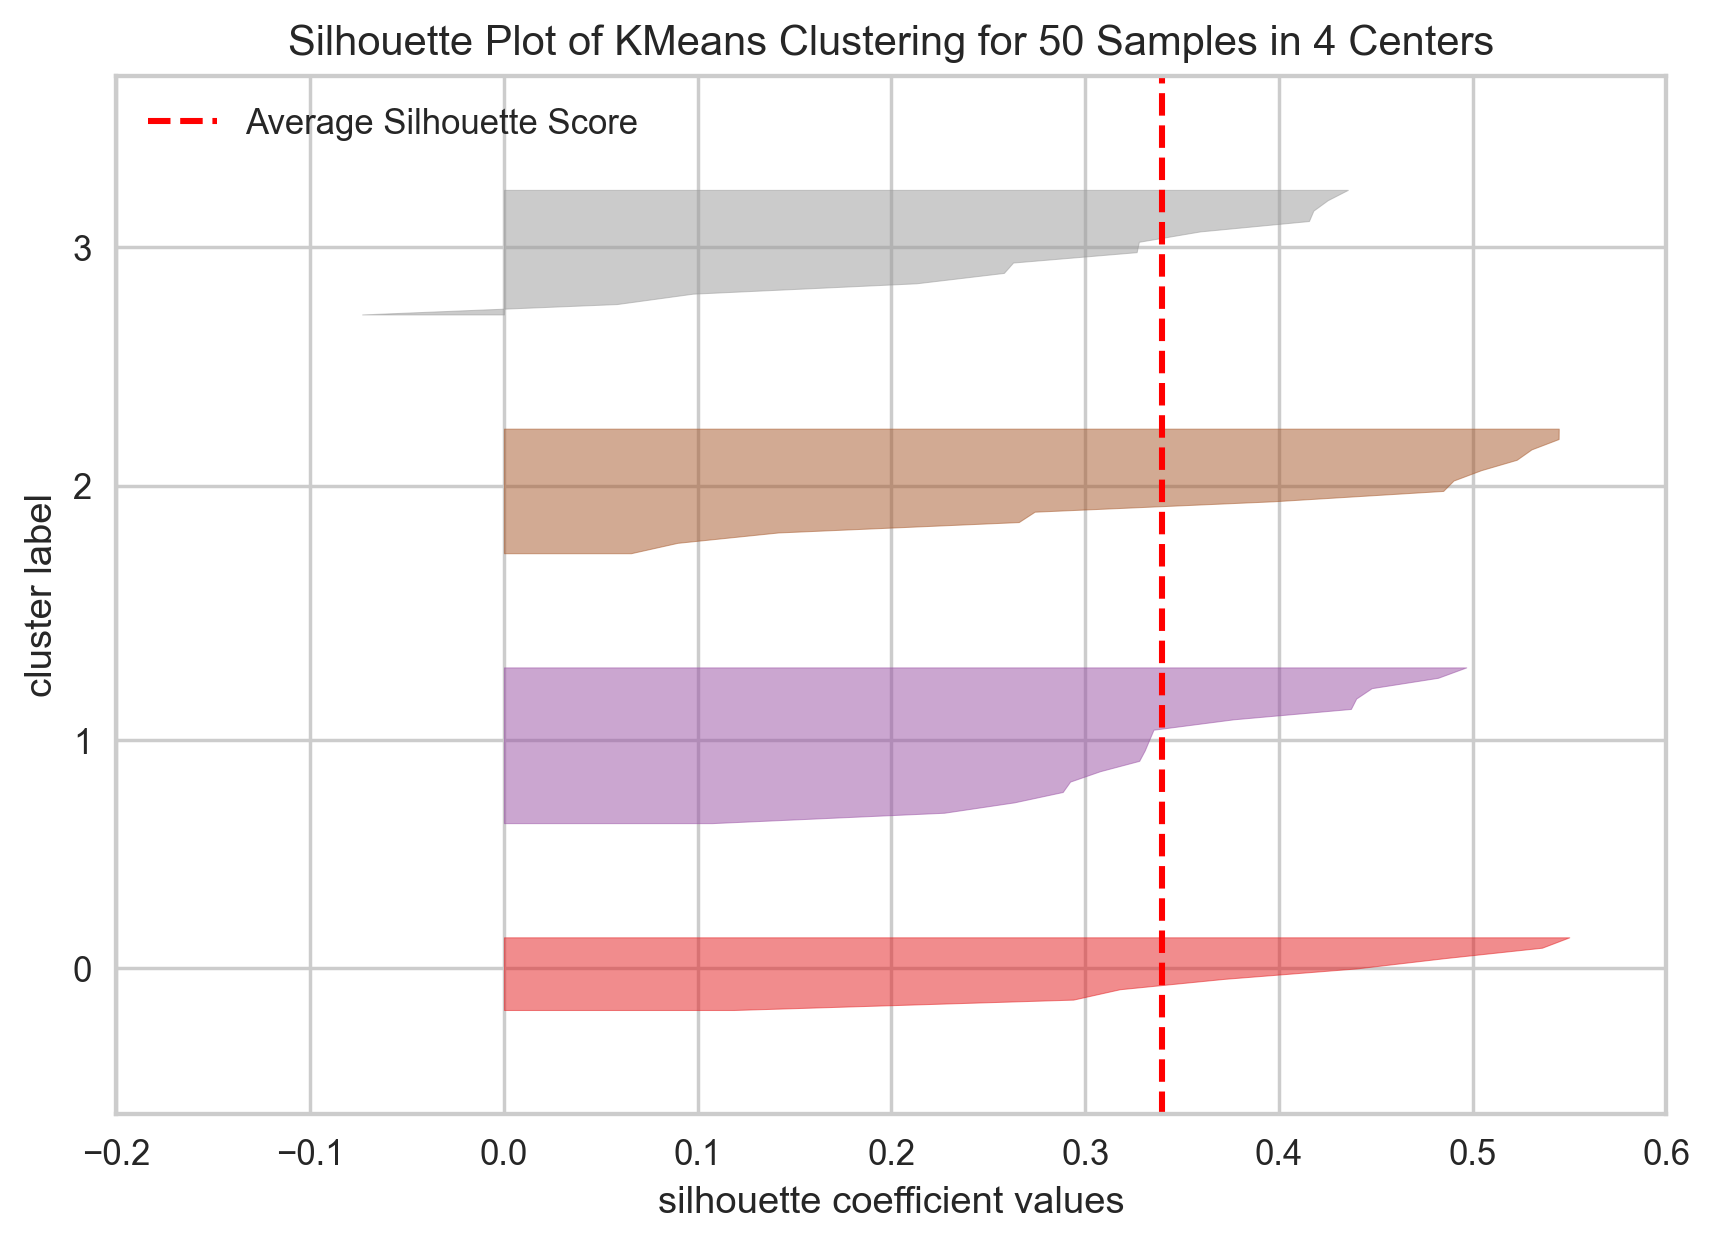

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [149]:
model = KMeans(n_clusters=4)
vis =SilhouetteVisualizer(model)

vis.fit(df1)
vis.show()

In [ ]:
#DB Scan Clustering

In [173]:
new_df


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8
